In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Import TensorFlow 2.X. into Google Collab
import tensorflow as tf
print("TF version:", tf.__version__)

# Import Tensorflow Hub
import tensorflow_hub as hub
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.12.0
TF Hub version: 0.13.0
GPU not available


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving classes.csv to classes.csv
Saving test.csv to test.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['classes.csv']))
print(df)


       label                            ID
0     Fungal                  DSC_7777.jpg
1     Fungal                  DSC_5994.jpg
2     Fungal                  DSC_5976.jpg
3     Fungal                  IMG_5604.jpg
4     Fungal                  DSC_7781.jpg
..       ...                           ...
372  Healthy       IMG-20170717-WA0039.jpg
373  Healthy       IMG-20170717-WA0042.jpg
374  Healthy       IMG-20170813-WA0060.jpg
375  Healthy  WP_20150828_09_55_13_Pro.jpg
376  Healthy  WP_20150828_10_01_42_Pro.jpg

[377 rows x 2 columns]


In [ ]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [ ]:
df_healthy=df.loc[df['label']=='Healthy']
df_healthy

,label,ID
296,Healthy,Copy of DSC09556.jpg
297,Healthy,Copy of DSC_9608.jpg
298,Healthy,Copy of DSC_9606.jpg
299,Healthy,Copy of DSC_9229.jpg
300,Healthy,Copy of DSC_5938.jpg
...,...,...
372,Healthy,IMG-20170717-WA0039.jpg
373,Healthy,IMG-20170717-WA0042.jpg
374,Healthy,IMG-20170813-WA0060.jpg
375,Healthy,WP_20150828_09_55_13_Pro.jpg


In [ ]:
df_fungal=df.loc[df['label']=='Fungal']
df_fungal

,label,ID
0,Fungal,DSC_7777.jpg
1,Fungal,DSC_5994.jpg
2,Fungal,DSC_5976.jpg
3,Fungal,IMG_5604.jpg
4,Fungal,DSC_7781.jpg
...,...,...
163,Fungal,DSC_0038.jpg
164,Fungal,DSC_0033.jpg
165,Fungal,7.jpg
166,Fungal,5.jpg


In [ ]:
df_bacterial=df.loc[df['label']=='Bacterial']
df_bacterial

,label,ID
168,Bacterial,DSC_4306.jpg
169,Bacterial,DSC_4305.jpg
170,Bacterial,DSC_4304.jpg
171,Bacterial,DSC_4303.jpg
172,Bacterial,DSC_4302.jpg
...,...,...
291,Bacterial,DSCN9787.jpg
292,Bacterial,DSCN9788.jpg
293,Bacterial,DSCN9815.jpg
294,Bacterial,DSCN9816.jpg


In [ ]:
test_healthy=test.loc[test['label']=='Healthy']
test_healthy

,label,ID
32,Healthy,Copy of DSC_1986.jpg
33,Healthy,Copy of DSC_1985.jpg
34,Healthy,Copy of DSC_1983.jpg
35,Healthy,Copy of DSC_1982.jpg
36,Healthy,Copy of DSC_1981.jpg
37,Healthy,IMG-20160108-WA0006.jpg
38,Healthy,IMG-20160108-WA0009.jpg
39,Healthy,IMG-20160108-WA0010.jpg
40,Healthy,IMG-20160108-WA0011.jpg
41,Healthy,IMG-20160108-WA0019.jpg


In [ ]:
test_fungal=test.loc[test['label']=='Fungal']
test_fungal

,label,ID
0,Fungal,IMG_5635.jpg
1,Fungal,IMG_5616.jpg
2,Fungal,IMG_5605.jpg
3,Fungal,IMG_5601.jpg
4,Fungal,IMG_5585.jpg
5,Fungal,IMG_5662.jpg
6,Fungal,IMG_5637.jpg
7,Fungal,IMG_5602.jpg
8,Fungal,IMG_5627.jpg
9,Fungal,IMG-20170816-WA0012.jpg


In [ ]:
test_bacterial=test.loc[test['label']=='Bacterial']
test_bacterial

,label,ID
14,Bacterial,IMG-20150601-WA0002.jpg
15,Bacterial,IMG-20170706-WA0052.jpg
16,Bacterial,IMG-20170706-WA0054.jpg
17,Bacterial,IMG-20170706-WA0055.jpg
18,Bacterial,IMG-20181119-WA0011.jpg
19,Bacterial,IMG-20181119-WA0012.jpg
20,Bacterial,IMG-20190128-WA0013.jpg
21,Bacterial,IMG-20190128-WA0009.jpg
22,Bacterial,IMG-20190128-WA0011.jpg
23,Bacterial,IMG-20190128-WA0019.jpg


In [ ]:
%cd /content/drive/My\ Drive/


/content/drive/My Drive


In [ ]:
healthy_filenames = ["Fruits/Healthy/" + fname  for fname in df_healthy["ID"]]
fungal_filenames = ["Fruits/Fungal/" + fname  for fname in df_fungal["ID"]]
bacterial_filenames = ["Fruits/Bacterial/" + fname  for fname in df_bacterial["ID"]]
frames=fungal_filenames+bacterial_filenames+healthy_filenames
frames=pd.DataFrame(frames)
# result = pd.concat(frames)

In [ ]:
healthy_filenames_test = ["Fruits/Healthy/" + fname  for fname in test_healthy["ID"]]
fungal_filenames_test = ["Fruits/Fungal/" + fname  for fname in test_fungal["ID"]]
bacterial_filenames_test = ["Fruits/Bacterial/" + fname  for fname in test_bacterial["ID"]]
frames_test=fungal_filenames_test+bacterial_filenames_test+healthy_filenames_test
frames_test=pd.DataFrame(frames_test)
# result = pd.concat(frames)
# len(healthy_filenames_test)

In [ ]:
len(healthy_filenames)

81

In [ ]:
from IPython.display import Image

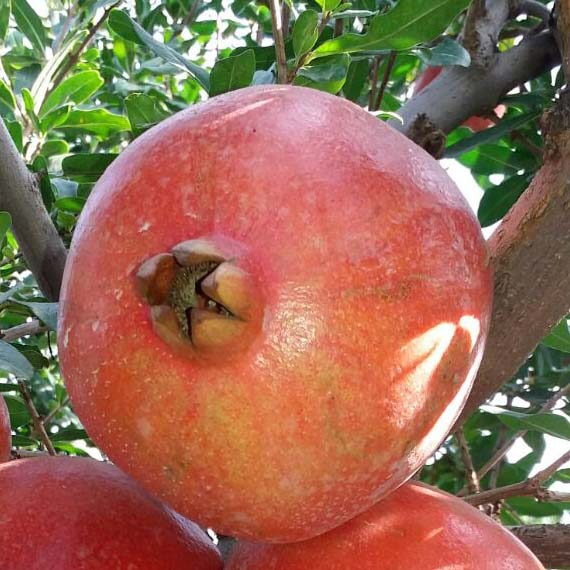

In [ ]:
Image(healthy_filenames_test[5])

In [ ]:
import numpy as np
labels = df["label"]
labels = np.array(labels)
labels

array(['Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fung

In [ ]:
import numpy as np
labels_test = test["label"]
labels_test = np.array(labels_test)
labels_test

array(['Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal', 'Fungal',
       'Fungal', 'Fungal', 'Bacterial', 'Bacterial', 'Bacterial',
       'Bacterial', 'Bacterial', 'Bacterial', 'Bacterial', 'Bacterial',
       'Bacterial', 'Bacterial', 'Bacterial', 'Bacterial', 'Bacterial',
       'Bacterial', 'Bacterial', 'Bacterial', 'Bacterial', 'Bacterial',
       'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Healthy'], dtype=object)

In [ ]:

frames["label"]=labels
frames.columns=['ID','label']


In [ ]:
frames_test["label"] = labels_test
frames_test.columns = ['ID','label']

In [ ]:
 frames = frames.sample(frac = 1)
 frames

,ID,label
62,Fruits/Fungal/DSC_5952.jpg,Fungal
324,Fruits/Healthy/Copy of DSC_5920.jpg,Healthy
69,Fruits/Fungal/DSC_7775.jpg,Fungal
296,Fruits/Healthy/Copy of DSC09556.jpg,Healthy
64,Fruits/Fungal/DSC_5942.jpg,Fungal
...,...,...
23,Fruits/Fungal/DSC_5980.jpg,Fungal
44,Fruits/Fungal/DSC_5978.jpg,Fungal
340,Fruits/Healthy/Copy of DSC_2114.jpg,Healthy
208,Fruits/Bacterial/DSC00009.jpg,Bacterial


In [ ]:
 frames_test = frames_test.sample(frac = 1)
 frames_test

,ID,label
39,Fruits/Healthy/IMG-20160108-WA0010.jpg,Healthy
7,Fruits/Fungal/IMG_5602.jpg,Fungal
29,Fruits/Bacterial/DSC_2004.jpg,Bacterial
16,Fruits/Bacterial/IMG-20170706-WA0054.jpg,Bacterial
30,Fruits/Bacterial/DSC_2005(1).jpg,Bacterial
19,Fruits/Bacterial/IMG-20181119-WA0012.jpg,Bacterial
5,Fruits/Fungal/IMG_5662.jpg,Fungal
1,Fruits/Fungal/IMG_5616.jpg,Fungal
32,Fruits/Healthy/Copy of DSC_1986.jpg,Healthy
37,Fruits/Healthy/IMG-20160108-WA0006.jpg,Healthy


In [ ]:

len(labels)
len(labels_test)

42

In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)



3

In [ ]:
unique_breeds_test = np.unique(labels_test)
len(unique_breeds_test)

3

In [ ]:
print(labels[0])
labels[0] == unique_breeds


Fungal


array([False,  True, False])

In [ ]:
print(labels_test[0])
labels_test[0] == unique_breeds_test

Fungal


array([False,  True, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
len(boolean_labels)

377

In [ ]:
boolean_labels_test = [label == unique_breeds_test for label in labels_test]
len(boolean_labels_test)

42

In [ ]:
from matplotlib.pyplot import imread
image = imread(healthy_filenames[42])
image.shape

(2130, 2130, 3)

In [ ]:
tf.constant(image)


<tf.Tensor: shape=(2130, 2130, 3), dtype=uint8, numpy=
array([[[239, 234, 230],
        [239, 234, 230],
        [239, 234, 230],
        ...,
        [237, 232, 228],
        [239, 234, 230],
        [239, 234, 230]],

       [[239, 234, 230],
        [239, 234, 230],
        [239, 234, 230],
        ...,
        [237, 232, 228],
        [239, 234, 230],
        [239, 234, 230]],

       [[239, 234, 230],
        [239, 234, 230],
        [239, 234, 230],
        ...,
        [237, 232, 228],
        [239, 234, 230],
        [239, 234, 230]],

       ...,

       [[228, 219, 212],
        [228, 219, 212],
        [228, 219, 212],
        ...,
        [230, 221, 214],
        [230, 221, 214],
        [230, 221, 214]],

       [[228, 219, 212],
        [228, 219, 212],
        [228, 219, 212],
        ...,
        [230, 221, 214],
        [230, 220, 218],
        [230, 220, 218]],

       [[228, 219, 212],
        [228, 219, 212],
        [228, 219, 212],
        ...,
        [230, 221, 

In [ ]:
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Gree, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values (Normalization)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


In [ ]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
from sklearn.model_selection import train_test_split
X_train = frames['ID']
y_train = boolean_labels
# X_train, X_val, y_train, y_val = train_test_split(X_train[:376],
#                                                   y_train[:376],
#                                                   test_size=0.1,
#                                                   random_state=42)


len(X_train), len(y_train)

(377, 377)

In [ ]:
X_test = frames_test['ID']
y_test = boolean_labels_test

In [ ]:
frames

,ID,label
62,Fruits/Fungal/DSC_5952.jpg,Fungal
324,Fruits/Healthy/Copy of DSC_5920.jpg,Healthy
69,Fruits/Fungal/DSC_7775.jpg,Fungal
296,Fruits/Healthy/Copy of DSC09556.jpg,Healthy
64,Fruits/Fungal/DSC_5942.jpg,Fungal
...,...,...
23,Fruits/Fungal/DSC_5980.jpg,Fungal
44,Fruits/Fungal/DSC_5978.jpg,Fungal
340,Fruits/Healthy/Copy of DSC_2114.jpg,Healthy
208,Fruits/Bacterial/DSC00009.jpg,Bacterial


In [ ]:

#len(X), len(y)

In [ ]:
X_train

62              Fruits/Fungal/DSC_5952.jpg
324    Fruits/Healthy/Copy of DSC_5920.jpg
69              Fruits/Fungal/DSC_7775.jpg
296    Fruits/Healthy/Copy of DSC09556.jpg
64              Fruits/Fungal/DSC_5942.jpg
                      ...                 
23              Fruits/Fungal/DSC_5980.jpg
44              Fruits/Fungal/DSC_5978.jpg
340    Fruits/Healthy/Copy of DSC_2114.jpg
208          Fruits/Bacterial/DSC00009.jpg
297    Fruits/Healthy/Copy of DSC_9608.jpg
Name: ID, Length: 377, dtype: object

In [ ]:
X_test

39      Fruits/Healthy/IMG-20160108-WA0010.jpg
7                   Fruits/Fungal/IMG_5602.jpg
29               Fruits/Bacterial/DSC_2004.jpg
16    Fruits/Bacterial/IMG-20170706-WA0054.jpg
30            Fruits/Bacterial/DSC_2005(1).jpg
19    Fruits/Bacterial/IMG-20181119-WA0012.jpg
5                   Fruits/Fungal/IMG_5662.jpg
1                   Fruits/Fungal/IMG_5616.jpg
32         Fruits/Healthy/Copy of DSC_1986.jpg
37      Fruits/Healthy/IMG-20160108-WA0006.jpg
36         Fruits/Healthy/Copy of DSC_1981.jpg
14    Fruits/Bacterial/IMG-20150601-WA0002.jpg
3                   Fruits/Fungal/IMG_5601.jpg
9        Fruits/Fungal/IMG-20170816-WA0012.jpg
20    Fruits/Bacterial/IMG-20190128-WA0013.jpg
23    Fruits/Bacterial/IMG-20190128-WA0019.jpg
18    Fruits/Bacterial/IMG-20181119-WA0011.jpg
28            Fruits/Bacterial/DSC_2003(1).jpg
33         Fruits/Healthy/Copy of DSC_1985.jpg
38      Fruits/Healthy/IMG-20160108-WA0009.jpg
11       Fruits/Fungal/IMG-20170222-WA0030.jpg
12       Frui

In [ ]:
get_image_label(X_train[38],y_train[38])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.89291596, 0.89291596, 0.8870111 ],
         [0.8912103 , 0.8961848 , 0.88816786],
         [0.892367  , 0.8958684 , 0.8941177 ],
         ...,
         [0.8941177 , 0.8941177 , 0.8889639 ],
         [0.8907898 , 0.8907898 , 0.88294667],
         [0.89019614, 0.89019614, 0.882353  ]],
 
        [[0.89019614, 0.8980393 , 0.8906163 ],
         [0.89019614, 0.8980393 , 0.8862746 ],
         [0.89278716, 0.89544827, 0.8883179 ],
         ...,
         [0.89278716, 0.89278716, 0.884944  ],
         [0.89323837, 0.89323837, 0.8853952 ],
         [0.8941177 , 0.8941177 , 0.8862746 ]],
 
        [[0.89361376, 0.89361376, 0.8857706 ],
         [0.8907976 , 0.89864075, 0.88687605],
         [0.892297  , 0.8941177 , 0.88676226],
         ...,
         [0.8948161 , 0.8948161 , 0.88697296],
         [0.8944264 , 0.8944264 , 0.88658327],
         [0.8946218 , 0.8946218 , 0.88677865]],
 
        ...,
 
        [[0.88277316, 0.8941177 

In [ ]:
get_image_label(X_test[10],y_test[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.1402325 , 0.30885997, 0.13120694],
         [0.12650983, 0.28450632, 0.11056338],
         [0.15734069, 0.29951504, 0.12375522],
         ...,
         [0.10398986, 0.25400746, 0.01864296],
         [0.13653933, 0.25142017, 0.04380477],
         [0.16317728, 0.2729812 , 0.0729812 ]],
 
        [[0.13927244, 0.2989013 , 0.10683617],
         [0.14446296, 0.29665616, 0.10734568],
         [0.14815818, 0.28436086, 0.09837005],
         ...,
         [0.14581469, 0.28586882, 0.05404081],
         [0.17769337, 0.2826803 , 0.06976029],
         [0.26927027, 0.36753708, 0.16223244]],
 
        [[0.13256304, 0.28186977, 0.07149336],
         [0.13838926, 0.28448522, 0.0794993 ],
         [0.11143192, 0.24116765, 0.04409131],
         ...,
         [0.16982745, 0.28772822, 0.07320575],
         [0.21639927, 0.30479378, 0.09996551],
         [0.25217155, 0.330386  , 0.13420403]],
 
        ...,
 
        [[0.61178666, 0.588659  

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shfulle if it's validation data.
  Also accepts test data as inputs  (no labels).
  """

  # If the data is a test dataset, we know we do not have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(batch_size)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                              tf.constant(y))) # labels
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch =data.batch(batch_size)

    return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
#val_data = create_data_batches(X_val,y_val)
test_data = create_data_batches(X_test,y_test)

Creating training data batches...
Creating training data batches...


In [ ]:
# test_data = create_data_batches(X_test,y_test)

In [ ]:
test_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 3), dtype=tf.bool, name=None))

In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 3), dtype=tf.bool, name=None))

In [ ]:
INPUT_SHAPE = [None,224, 224, 3] # Batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = 3
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url= MODEL_URL):
  """
  Setup the layers based on TensorFlow Hub, Compiles the model using CategoricalCrossentropy for loss, Adam for optimizing, and accuracy as metric, and finally bulid the model and return it.
  """

  print("Building model with:", model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
          hub.KerasLayer(model_url), # Layer 1 (input layer)
          tf.keras.layers.Dense(units = output_shape,
                                activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Bulid the model
  model.build(input_shape)

  return model

In [ ]:

model = create_model()
model.summary()


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_6 (Dense)             (None, 3)                 3006      
                                                                 
Total params: 5,435,719
Trainable params: 3,006
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
test_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 3), dtype=tf.bool, name=None))

In [ ]:
NUM_EPOCHS = 15

In [ ]:
%load_ext tensorboard


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import os

In [ ]:

import datetime

# Create a function to bulid a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  #  patience=3)

In [ ]:

# Bulid a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_freq=1,
            callbacks=[tensorboard])

  # Return the fitted model
  return model


In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/15
12/12 [==============================] - 50s 4s/step - loss: 1.2697 - accuracy: 0.3793
Epoch 2/15
12/12 [==============================] - 48s 4s/step - loss: 1.1031 - accuracy: 0.4589
Epoch 3/15
12/12 [==============================] - 46s 4s/step - loss: 1.0110 - accuracy: 0.5066
Epoch 4/15
12/12 [==============================] - 46s 4s/step - loss: 0.9526 - accuracy: 0.5438
Epoch 5/15
12/12 [==============================] - 49s 4s/step - loss: 0.9179 - accuracy: 0.5597
Epoch 6/15
12/12 [==============================] - 47s 4s/step - loss: 0.8820 - accuracy: 0.5809
Epoch 7/15
12/12 [==============================] - 47s 4s/step - loss: 0.8500 - accuracy: 0.6313
Epoch 8/15
12/12 [==============================] - 52s 4s/step - loss: 0.8156 - accuracy: 0.6446
Epoch 9/15
12/12 [==============================] - 46s 4s/step - loss: 0.7925 - accuracy: 0.6525
Epoch 10/15
12/12 [======

In [ ]:

accuracy = model.history.history["accuracy"]
# val_accuracy =model.history.history["val_accuracy"]

In [ ]:
loss = model.history.history["loss"]
# val_loss = model.history.history["val_loss"]

In [ ]:
import matplotlib.pyplot as plt


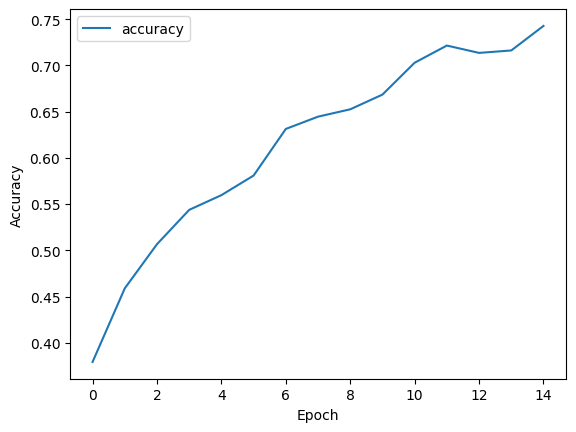

In [ ]:
plt.plot(accuracy, label="accuracy")
# plt.plot(val_accuracy, label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

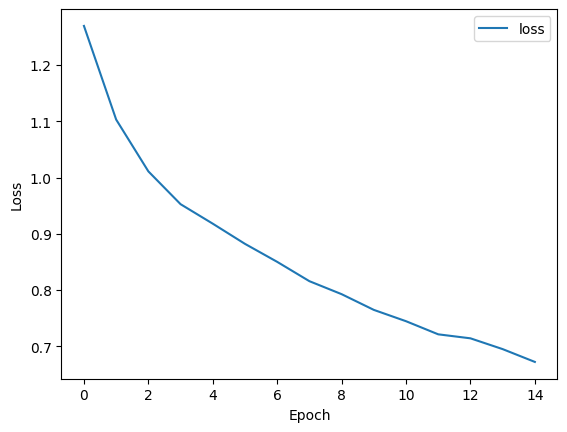

In [ ]:
plt.plot(loss, label="loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(test_data)

2/2 [==============================] - 9s 858ms/step


In [ ]:
predicted_labels = np.argmax(prediction, axis=1)
len(predicted_labels)

42

In [1]:
print('0-13 are fungal - class 1')
print(predicted_labels[:12])
print('Accuracy  = ',700/14)

0-13 are fungal - class 1


NameError: ignored

In [ ]:
print('14-33 are bacterial - class 0')
print(predicted_labels[13:33z])
print('Accuracy = ',900/18)

14-33 are bacterial - class 0
[1 1 1 1 0 0 0 0 1 2 1 0 1 0 1 2 0 0 0]
Accuracy =  50.0


In [ ]:
print('33-42 are healthy - class 2')
print(predicted_labels[34:])
print('Accuracy = ',100/8)

33-42 are healthy - class 2
[0 1 0 0 2 1 1 0]
Accuracy =  12.5
